<a href="https://colab.research.google.com/github/aaas24/colabs/blob/main/W2_logistic_regression_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Model to Beat

##Preprocessing Data

In [ ]:
telco_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Telco-Customer-Churn.csv')

In [ ]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_data.Churn.value_counts()

No     3738
Yes    1332
Name: Churn, dtype: int64

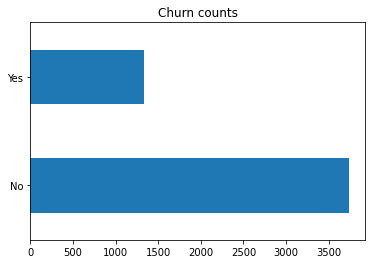

In [ ]:
telco_data.Churn.value_counts().plot(kind='barh', title='Churn counts')
plt.show() 

In [ ]:
telco_data['Churn'] = telco_data.Churn.replace({'Yes':1, 'No':0}) # Replacing 'Yes' and 'No' with numerical values

In [ ]:
y = telco_data.pop('Churn') # Removing Churn field and storing it in variable y
X = telco_data[['SeniorCitizen', 'tenure', 'InternetService', 'gender']] # Creating a smaller subset of features

In [ ]:
X = pd.get_dummies(X, columns=['InternetService', 'gender'], drop_first=True) # create dummy variables

### Splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.head()

,SeniorCitizen,tenure,InternetService_Fiber optic,InternetService_No,gender_Male
1238,1,16,1,0,0
113,1,37,1,0,0
2874,0,64,0,1,0
3464,0,31,1,0,0
661,0,10,0,0,0


### Fitting model

In [ ]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(X_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X_test)[:, 1]

## Evaluating model

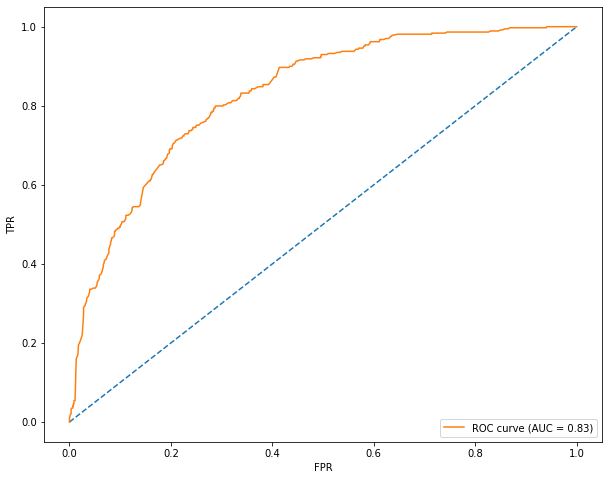

In [ ]:
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(10, 8))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

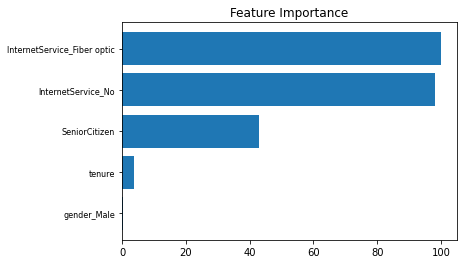

In [ ]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

plt.title('Feature Importance')
plt.show()

# My Model

## Preprocessing Data

### Data Exploration

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/Telco-Customer-Churn.csv')

In [ ]:
# missing data
((df
 .isna()
 .mean()
 *100)
 .pipe(lambda ser:ser[ser>0])
)

Series([], dtype: float64)

In [ ]:
#types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

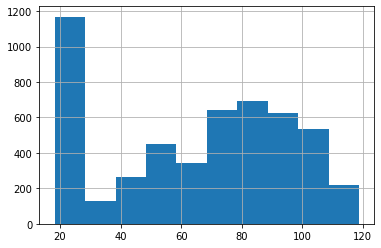

In [ ]:
df.MonthlyCharges.hist()

In [ ]:
# with pd.option_context('display.max_columns', 100, 'display.min_rows',5000): 
#   display(df.TotalCharges.value_counts(dropna=False))

In [ ]:
#drop rows where TotalCharges are empty
df=df.loc[df.TotalCharges != " "]
print(df.shape)

(5062, 21)


In [ ]:
#changing dtypes

df.TotalCharges.astype(float)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#numerical columns
numerical_cols = df.columns[df.dtypes=='int64'].tolist()
numerical_cols

['SeniorCitizen', 'tenure']

In [ ]:
#categorical column
categorical_cols = df.columns[df.dtypes=='object'].tolist()
categorical_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [ ]:
#multi_valued
multi_valued_colmmns = df[categorical_cols].nunique()[df[categorical_cols].nunique() > 2].index.tolist()
multi_valued_colmmns

['customerID',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'TotalCharges']

In [ ]:
#binary
binary_colmmns = df[categorical_cols].nunique()[df[categorical_cols].nunique() == 2].index.tolist()
binary_colmmns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [ ]:
#Single value
single_valued_colmmns = df[categorical_cols].nunique()[df[categorical_cols].nunique() == 1].index.tolist()
single_valued_colmmns

[]

In [ ]:
# column_names=df.columns.values
# for column in column_names:
#   print(column)
#   print(df[column].value_counts(dropna=False))
#   print(' ')
#   print('------------------------------------------- ')

### Data Cleaning

In [ ]:
#drop columns for model
columns_to_drop=["customerID"]
if len(columns_to_drop)==0:
  pass
else: 
  for item in columns_to_drop:
    if item in multi_valued_colmmns: multi_valued_colmmns.remove(item)
    if item in categorical_cols: categorical_cols.remove(item)

  df=df.drop(columns_to_drop, axis=1)

In [ ]:
# Transform single_value columns
df.drop(columns=single_valued_colmmns, inplace=True)

In [ ]:
# Transform binary_columns
for column in binary_colmmns :
  df[column] = LabelEncoder().fit_transform(df[column])

In [ ]:
# Transform multivalued columns
columns_to_skip=["TotalCharges"]

for item in columns_to_skip:
  if item in multi_valued_colmmns: multi_valued_colmmns.remove(item)
  print(multi_valued_colmmns)

['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


### Normalization

In [ ]:
# Transform multivalued columns

dummies_adjusted_data = pd.get_dummies(data = df, columns=multi_valued_colmmns, drop_first=True)
dummies_adjusted_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,1,1,0,0,33,1,1,24.90,847.8,0,...,0,1,0,1,0,1,0,0,0,0
5066,1,0,1,0,44,0,0,54.30,2390.45,0,...,0,0,1,0,1,0,1,0,0,0
5067,0,0,1,1,30,1,0,66.30,1923.5,0,...,1,0,0,0,1,0,0,0,0,0
5068,0,0,1,0,71,1,1,20.90,1493.2,0,...,0,1,0,1,0,0,1,0,0,0


In [ ]:
print(numerical_cols)

['SeniorCitizen', 'tenure']


In [ ]:
columns_to_add=['MonthlyCharges','TotalCharges']
for column in columns_to_add:
  numerical_cols.append(column)
  dummies_adjusted_data[column]=dummies_adjusted_data[column].astype("float")
  print('adding:',column, type(dummies_adjusted_data[column][0]))
print(numerical_cols)

adding: MonthlyCharges <class 'numpy.float64'>
adding: TotalCharges <class 'numpy.float64'>
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
# Z-Score normalization
numerical_columns = dummies_adjusted_data[numerical_cols]
scaled_numerical = numerical_columns.div(numerical_columns.mean(), axis=1)
scaled_numerical.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5062.000000,5062.000000,5062.000000,5062.000000
mean,1.000000,1.000000,1.000000,1.000000
std,2.289697,0.762214,0.465161,0.997990
min,0.000000,0.030978,0.281642,0.008277
25%,0.000000,0.278801,0.547851,0.171133
50%,0.000000,0.898358,1.086442,0.614051
75%,0.000000,1.703783,1.388146,1.647097
max,6.241677,2.230406,1.832600,3.823420


In [ ]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(dummies_adjusted_data[numerical_cols])
scaled = pd.DataFrame(scaled,columns=numerical_cols)
scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.436782,-1.271450,-1.159588,-0.988944
1,-0.436782,0.069866,-0.260417,-0.168517
2,-0.436782,-1.230804,-0.363274,-0.954400
3,-0.436782,0.516971,-0.746500,-0.190024
4,-0.436782,-1.230804,0.195805,-0.935209
...,...,...,...,...
5057,2.289471,0.029220,-1.323828,-0.628087
5058,-0.436782,0.476325,-0.348343,0.052489
5059,-0.436782,-0.092718,0.049814,-0.153517
5060,-0.436782,1.573766,-1.456547,-0.343354


In [ ]:
scaled.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5.062000e+03,5.062000e+03,5.062000e+03,5.062000e+03
mean,1.585281e-16,-7.154381e-17,3.235043e-18,8.509809e-18
std,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00
min,-4.367821e-01,-1.271450e+00,-1.544474e+00,-9.938192e-01
25%,-4.367821e-01,-9.462828e-01,-9.721226e-01,-8.306182e-01
50%,-4.367821e-01,-1.333640e-01,1.858513e-01,-3.867650e-01
75%,-4.367821e-01,9.234305e-01,8.345157e-01,6.484642e-01
max,2.289471e+00,1.614412e+00,1.790093e+00,2.829387e+00


In [ ]:
dummies_adjusted_data.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [ ]:
#dropping original values merging scaled values for numerical columns
dummies_adjusted_data = dummies_adjusted_data.copy()
data = dummies_adjusted_data.drop(columns = numerical_cols,axis = 1)
data = data.merge(scaled_numerical,left_index=True,right_index=True,how = "left")
data

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0.000000,0.030978,0.460658,0.013141
1,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0.000000,1.053247,0.878876,0.831839
2,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0.000000,0.061956,0.831036,0.047612
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0.000000,1.394004,0.652791,0.810377
4,0,0,0,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0.000000,0.061956,1.091072,0.066763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,1,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,0,6.241677,1.022270,0.384267,0.373238
5066,1,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0.000000,1.363026,0.837980,1.052378
5067,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0.000000,0.929336,1.023169,0.846807
5068,0,1,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0.000000,2.199428,0.322538,0.657370


### Multicolinearity

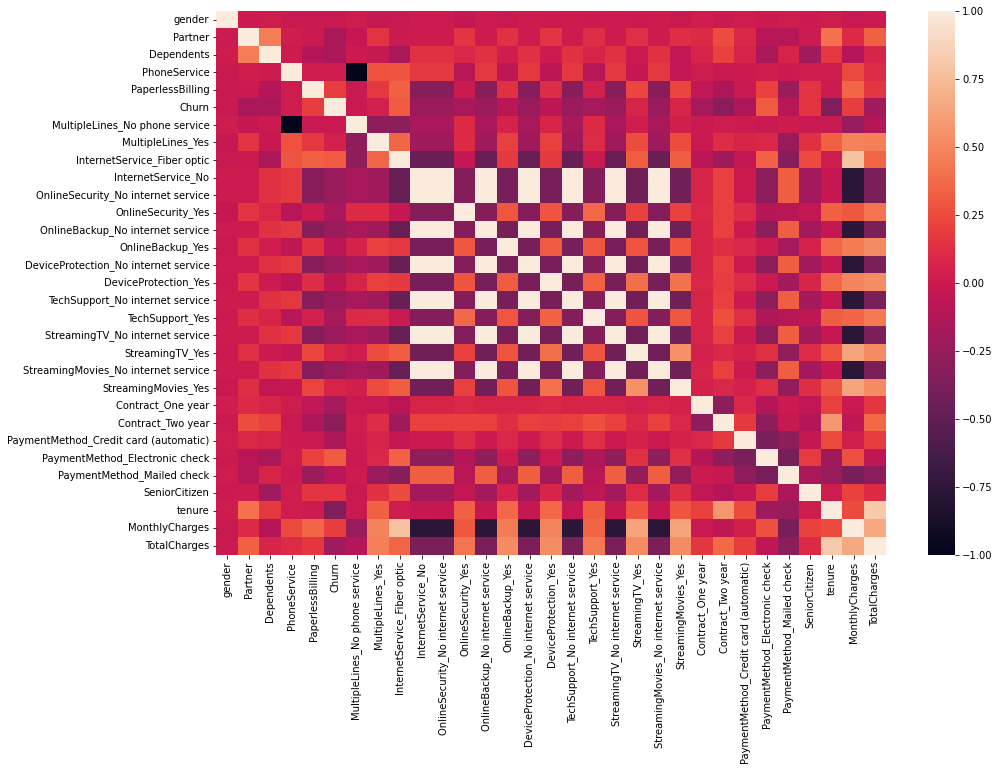

In [ ]:
corr_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix)
plt.show()

In [ ]:
cols_to_melt = corr_matrix.columns
corr_matrix = corr_matrix.reset_index()

In [ ]:
corr_matrix_melted = corr_matrix.melt( id_vars='index', value_vars=cols_to_melt)
corr_matrix_melted = corr_matrix_melted[corr_matrix_melted['index'] != corr_matrix_melted['variable']]
corrlations_above_threshold = corr_matrix_melted[corr_matrix_melted.value.abs() > .8]
columns_to_drop = corrlations_above_threshold['index'].to_list()
columns_to_drop

['MultipleLines_No phone service',
 'PhoneService',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'InternetService_No',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No 

In [ ]:
data.drop(columns=columns_to_drop, inplace=True)

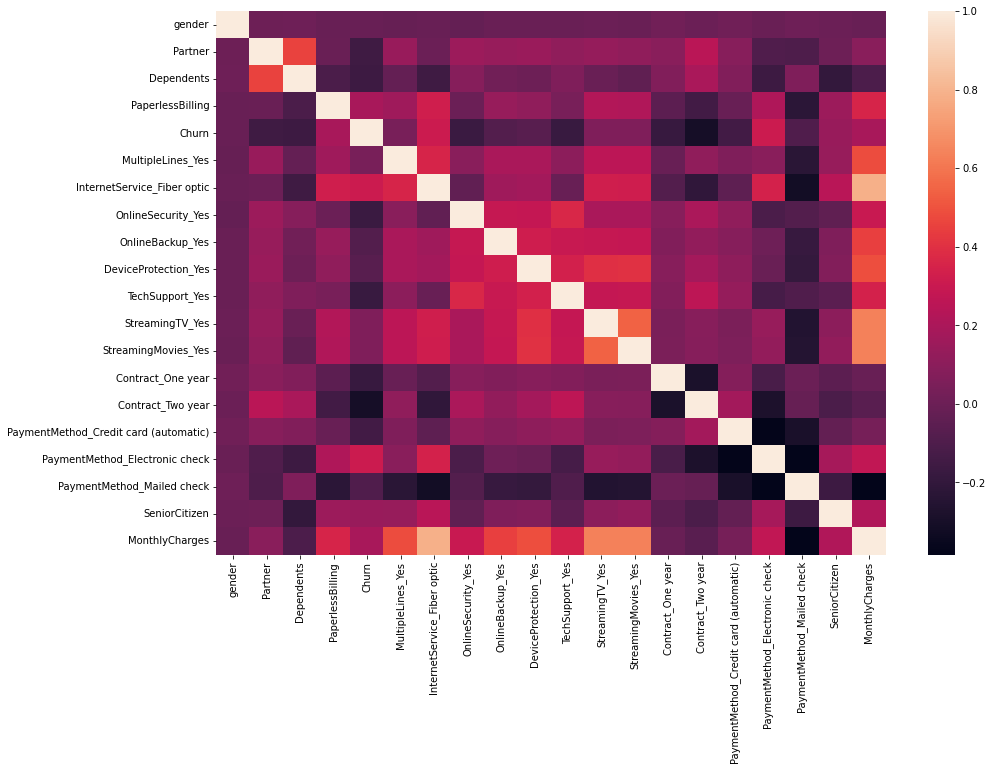

In [ ]:
corr_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix)
plt.show()

### Dealing with Unbalanced data

In [ ]:
target='Churn'

In [ ]:
data[target].value_counts()

0    3730
1    1332
Name: Churn, dtype: int64

In [ ]:
positive_labels = data[data[target]==1]
num_positive_labels = positive_labels.shape[0]
num_positive_labels

1332

In [ ]:
negative_labels = data[data[target]==0].sample(num_positive_labels)
negative_labels.shape

(1332, 20)

In [ ]:
balanced_data =  positive_labels.append(negative_labels)
balanced_data[target].value_counts()

1    1332
0    1332
Name: Churn, dtype: int64

### Splitting data into test splits

In [ ]:
balanced_data.head()

,gender,Partner,Dependents,PaperlessBilling,Churn,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,MonthlyCharges
2,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0.0,0.831036
4,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0.0,1.091072
5,0,0,0,1,1,1,1,0,0,1,0,1,1,0,0,0,1,0,0.0,1.537841
8,0,1,0,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0,0.0,1.617317
13,1,0,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0.0,1.600342


In [ ]:
y = balanced_data.pop(target)
X = balanced_data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.head()

,gender,Partner,Dependents,PaperlessBilling,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,MonthlyCharges
3824,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.000000,0.853413
1022,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,6.241677,1.307126
2502,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0.000000,0.402015
4770,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.000000,0.304019
1579,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,6.241677,1.241538


## Resulting Model

### Fitting Model

In [ ]:
# fit a model
clf = LogisticRegression(penalty='l2').fit(X_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X_test)[:, 1]

### Predictions

In [ ]:
# Predict probabilities given test data
y_pred = clf.predict_proba(X_test)

### ROC Curve

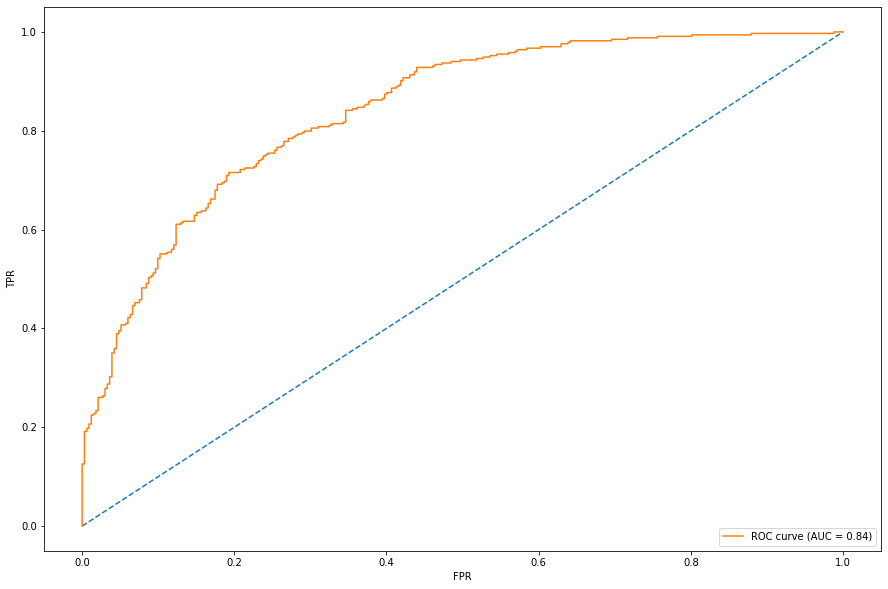

In [ ]:
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

### Feature Importance

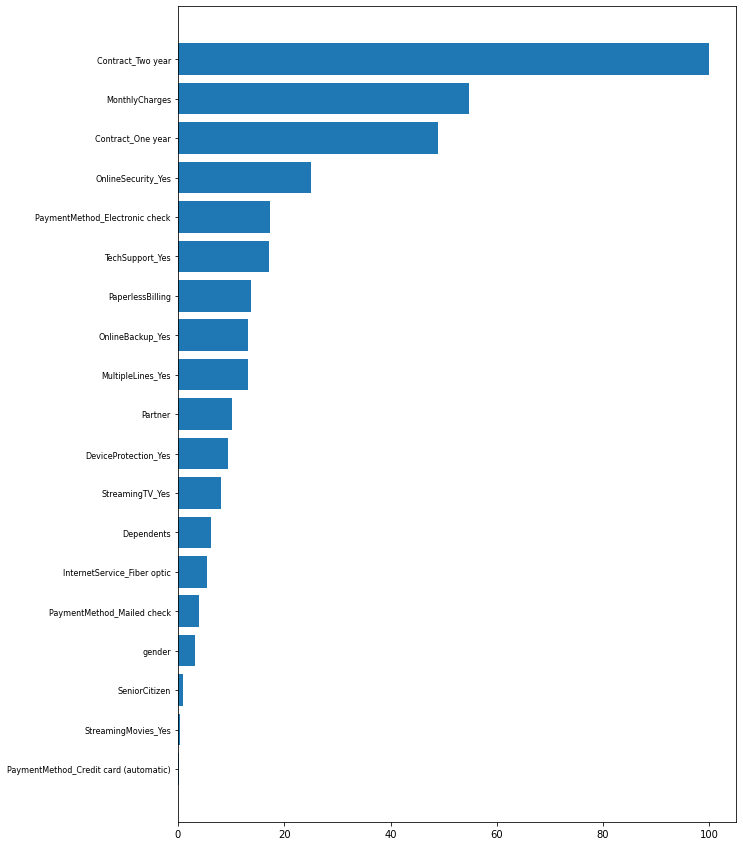

In [ ]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10, 15))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

plt.show()

### Confusion Matrix

In [ ]:
df_confusion = pd.crosstab(y_pred.round()[:,1], y_test, rownames=['Predicted'], colnames=['Actual'], margins=True)
df_confusion

Actual,0,1,All
Predicted,,,
0.0,236,68,304
1.0,96,266,362
All,332,334,666
